# Reading the data and grouping it by sentence numbers

In [838]:
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [839]:
predict =pd.read_pickle('bin_predict_named_entities.pkl')

In [840]:
predict_mat = predict.groupby('sent_num').sum().reset_index()
predict_mat.head(5)

,sent_num,NCTID,sum,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
0,1,NCT00347282NCT02612909NCT03345108NCT01943474NC...,Post-enucleation socket syndrome (PESS - enoph...,846,919,725,791,633,806,764,741,833,725
1,2,NCT00347282NCT02612909NCT03345108NCT01622699NC...,"The underlying pathophysiology, however, has n...",575,650,495,523,420,520,475,476,559,467
2,3,NCT00347282NCT02612909NCT03345108NCT01622699NC...,It is especially prominent when there is inade...,379,459,327,372,291,363,317,318,369,318
3,4,NCT00347282NCT02612909NCT01622699NCT00353197NC...,An ideal orbital implant replaces 70-80% of th...,242,277,208,235,209,220,209,190,230,199
4,5,NCT00347282NCT02612909NCT01622699NCT02340494NC...,"implant size 20-22mm), while the ocular prosth...",138,165,127,143,119,134,141,120,139,125


In [841]:
del predict_mat['NCTID']
del predict_mat['sum']


In [842]:
# Just considering the first seven sentences of the original and predicted summaries
predict_mat = predict_mat.iloc[:7]

# Generating nodes for the bipartite graph based on the columns of the dataframe

In [843]:
columns = list(predict_mat.columns)
columns.pop(0)
columns

['disease',
 'medical condition',
 'drug',
 'device',
 'Dose or measurements',
 'clinical trial phase',
 'population',
 'Time',
 'Medical Procedure',
 'Biomarker']

In [844]:
# define the graph and add nodes to the bipartite graph
G_predict = nx.DiGraph()
G_predict.add_nodes_from(predict_mat['sent_num'], bipartite=0)
G_predict.add_nodes_from(columns, bipartite=1)

In [845]:
for i, row in predict_mat.iterrows():
    j = predict_mat['sent_num'][i]
    for col_name, col_value in row.items():  # Corrected from iteritems() to items()
        if col_name == "sent_num":
            continue
        if col_value > 0:
            G_predict.add_edge(j, col_name, weight=col_value)

# Generating the graph for predicted summaries (generated br BART)

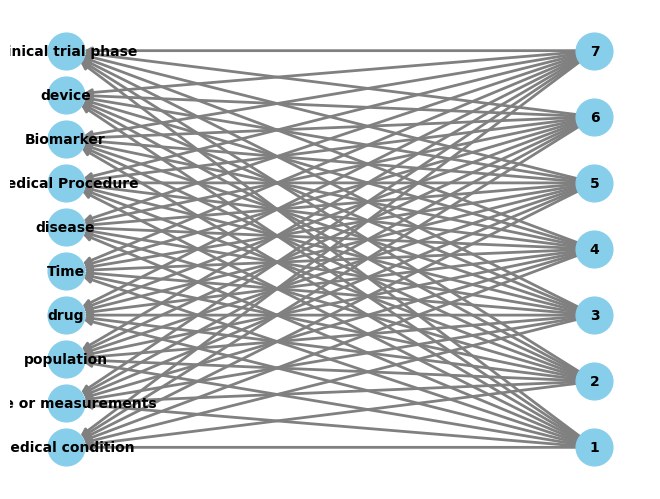

In [846]:
# Draw the graph
pos = nx.bipartite_layout(G_predict, columns)
nx.draw(G_predict, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', width=2, edge_cmap=plt.cm.Blues)

# Graph of the original summaries.

In [847]:
orig_test =pd.read_pickle('bin_original_test_named_entities.pkl')

In [848]:
def remove_last_char(text):
    text = text[:-1]
    return text

In [849]:
orig_test['NCTID'] = orig_test['NCTID'].apply(remove_last_char)

In [850]:
orig_test

,NCTID,sum,sent_num,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
0,NCT00107380,"RATIONALE: Radiolabeled monoclonal antibodies,...",1,1,1,1,1,1,1,1,1,1,1
1,NCT00107380,"Monoclonal antibodies, such as rituximab, can ...",2,1,1,1,1,1,1,0,0,1,1
2,NCT00107380,Some block the ability of cancer cells to grow...,3,1,1,0,0,0,0,0,0,0,0
3,NCT00107380,Others find cancer cells and help kill them or...,4,1,1,1,0,0,0,0,0,1,0
4,NCT00107380,"Drugs used in chemotherapy, such as cyclophosp...",5,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,NCT01614249,The role of this nutritional supplement in com...,4,1,1,0,1,0,0,1,0,0,0
3472,NCT01614249,"Yet, currently, more than 2 million pregnant w...",5,1,1,0,0,0,0,1,0,0,0
3473,NCT01614249,"In Kenya, about 9.0% of pregnant women are HIV...",6,1,1,0,0,1,0,1,0,0,1
3474,NCT01614249,"In this study, it is hypothesized that there i...",7,1,1,1,1,1,1,1,1,1,1


In [851]:
orig_test[orig_test['sent_num'] ==1].count()

NCTID                   1000
sum                     1000
sent_num                1000
disease                 1000
medical condition       1000
drug                    1000
device                  1000
Dose or measurements    1000
clinical trial phase    1000
population              1000
Time                    1000
Medical Procedure       1000
Biomarker               1000
dtype: int64

In [852]:
orig_test[orig_test.sent_num > 5]

,NCTID,sum,sent_num,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
5,NCT00107380,Giving a radiolabeled monoclonal antibody toge...,6,1,1,1,1,0,0,0,0,1,0
6,NCT00107380,PURPOSE: This phase II trial is studying how w...,7,1,1,1,1,1,1,1,1,1,1
13,NCT02046200,The goal of this project is to provide key cli...,6,1,1,1,0,0,1,1,0,1,0
37,NCT01641562,"However, these cannot detect subtle, early cha...",6,0,0,0,0,0,0,0,0,0,0
38,NCT01641562,"Consequently, description of new parameters, w...",7,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,NCT02956707,With the possibility that preoperative steroid...,9,1,1,1,1,1,1,1,1,1,1
3466,NCT03185338,"Keywords:children, physical activity, school,a...",6,1,1,1,1,0,1,1,1,1,1
3473,NCT01614249,"In Kenya, about 9.0% of pregnant women are HIV...",6,1,1,0,0,1,0,1,0,0,1
3474,NCT01614249,"In this study, it is hypothesized that there i...",7,1,1,1,1,1,1,1,1,1,1


In [853]:
orig_test_mat = orig_test.groupby('sent_num').sum().reset_index()
orig_test_mat.head(5)

,sent_num,NCTID,sum,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
0,1,NCT00107380NCT03425708NCT02046200NCT00748462NC...,"RATIONALE: Radiolabeled monoclonal antibodies,...",844,922,657,725,583,782,728,650,824,651
1,2,NCT00107380NCT02046200NCT03275467NCT02054429NC...,"Monoclonal antibodies, such as rituximab, can ...",412,496,371,380,308,386,335,342,413,348
2,3,NCT00107380NCT02046200NCT03275467NCT02054429NC...,Some block the ability of cancer cells to grow...,300,343,263,268,235,282,246,235,306,241
3,4,NCT00107380NCT02046200NCT03275467NCT02509429NC...,Others find cancer cells and help kill them or...,186,227,169,176,144,176,152,154,199,151
4,5,NCT00107380NCT02046200NCT03275467NCT02509429NC...,"Drugs used in chemotherapy, such as cyclophosp...",139,172,133,132,122,129,118,117,147,111


In [854]:
# Just considering the first seven sentences of the original and predicted summaries
orig_test_mat = orig_test_mat.iloc[:7]

In [855]:
del orig_test_mat['NCTID']
del orig_test_mat['sum']


In [856]:
def compare(a,b,feature):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    tmp1 = a.copy(deep=True)
    tmp1.set_index('sent_num', inplace=True)
    p1 = tmp1[feature].plot.bar(ax=ax1)
    
    tmp2 = b.copy(deep=True)
    tmp2.set_index('sent_num', inplace=True)
    p2 = tmp2[feature].plot.bar(ax=ax2)
    return p1,p2

# Distribution of the entity class "drug" in different sentences

(<Axes: xlabel='sent_num'>, <Axes: xlabel='sent_num'>)

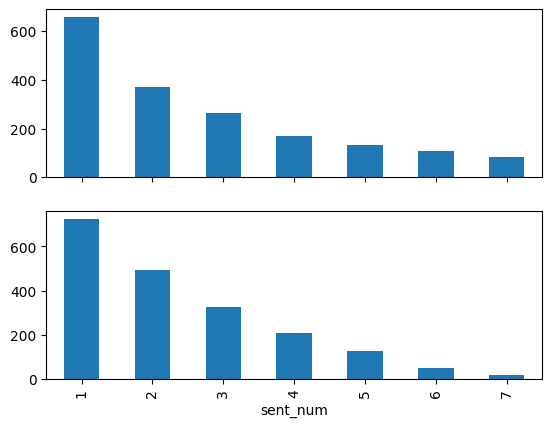

In [857]:

compare(orig_test_mat, predict_mat, 'drug')

<Axes: xlabel='sent_num'>

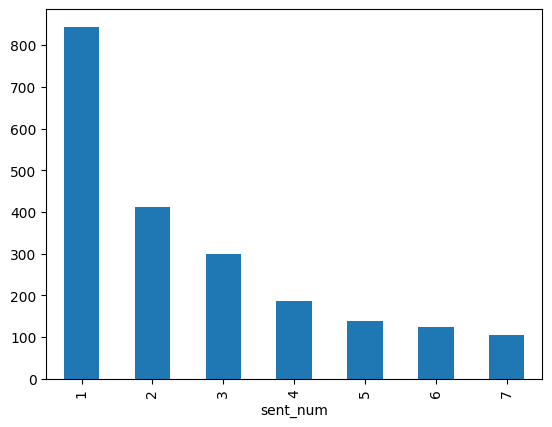

In [858]:
tmp = orig_test_mat.copy(deep=True)
tmp.set_index('sent_num', inplace=True)
tmp['disease'].plot.bar()

<Axes: xlabel='sent_num'>

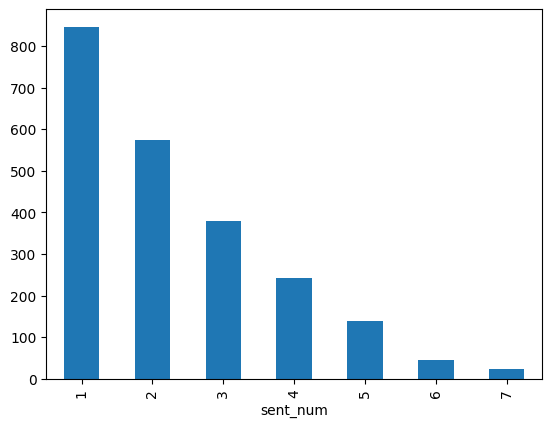

In [859]:
tmp = predict_mat.copy(deep=True)
tmp.set_index('sent_num', inplace=True)
tmp['disease'].plot.bar()

In [860]:
# define the graph and add nodes to the bipartite graph
G_orig_test = nx.DiGraph()
G_orig_test.add_nodes_from(orig_test_mat['sent_num'], bipartite=0)


columns = list(orig_test_mat.columns)
columns.pop(0)



G_orig_test.add_nodes_from(columns, bipartite=1)

In [861]:
for i, row in orig_test_mat.iterrows():
    j = orig_test_mat['sent_num'][i]
    for col_name, col_value in row.items():  # Corrected from iteritems() to items()
        if col_name == "sent_num":
            continue
        if col_value > 0:
            G_orig_test.add_edge(j, col_name, weight=col_value)

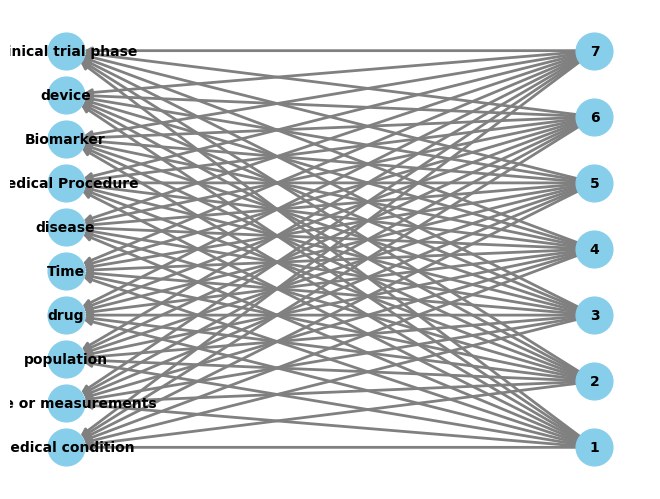

In [862]:
# Draw the graph
pos = nx.bipartite_layout(G_orig_test, columns)
nx.draw(G_orig_test, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', width=2, edge_cmap=plt.cm.Blues)

# single trial graph comparison

In [863]:
def graph_maker(nctid, base_matrix ):
    test_a = base_matrix[base_matrix['NCTID'] ==nctid]
    
    del test_a['NCTID']
    del test_a['sum']
    
    
    columns = list(test_a.columns)
    columns.pop(0)
    
    G_test_a = nx.Graph()
    G_test_a.add_nodes_from( test_a['sent_num'], bipartite=0)
    G_test_a.add_nodes_from(columns, bipartite=1)
    
    for i, row in test_a.iterrows():
        j = (test_a['sent_num'])[i]
        for col_name, col_value in row.items():  # Corrected from iteritems() to items()
            if col_name == "sent_num":
                continue
            if col_value is not None:
                if col_value > 0:
                    G_test_a.add_edge(j, col_name)
            else:
                print(i, row, col_name, col_value)
            
    # pos = nx.bipartite_layout( G_test_a, columns)
    # nx.draw( G_test_a, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', width=2, edge_cmap=plt.cm.Blues)
    return(G_test_a), test_a

In [864]:
predict.fillna(0, inplace=True)
orig_test.fillna(0, inplace=True)

In [865]:
dict1 = predict.groupby('NCTID')['sent_num'].max().to_dict()
dict2 = orig_test.groupby('NCTID')['sent_num'].max().to_dict()

In [866]:
intersection_dict = {key: dict1[key] for key in dict1 if key in dict2 and dict1[key] == dict2[key]}
# intersection_dict

In [867]:
uni = list(intersection_dict.keys())

In [868]:
predict = predict[predict['NCTID'].isin(uni)]
orig_test = orig_test[orig_test['NCTID'].isin(uni)]

# Creating graphs for all generated and original summaries, and comparing the graphs using Jaccard similarity

In [869]:
all_nct = list(predict['NCTID'].unique())
jaccard_sim = []
for nct in all_nct:
    predict
    g1, test_a = graph_maker(nct, predict)
    g2, test_b = graph_maker(nct, orig_test)
    edges_set_G1 = set(g1.edges())
    edges_set_G2 = set(g2.edges())
    if len(edges_set_G1.union(edges_set_G2)) > 0:
        jaccard_similarity = len(edges_set_G1.intersection(edges_set_G2)) / len(edges_set_G1.union(edges_set_G2))
    else:
        jaccard_similarity = 0
    jaccard_sim.append(jaccard_similarity)

     



In [870]:
sum(jaccard_sim)/ len(jaccard_sim)

0.7181913178987567

In [871]:
g1, test_a = graph_maker('NCT03576677', predict)

In [872]:
a = (predict[predict['NCTID'] == 'NCT00059891']).reset_index()
predict_len = 0 
for index , row in a.iterrows():
    predict_len +=len(row['sum'])

In [873]:
predict_len

362

In [874]:
a = (orig_test[orig_test['NCTID'] == 'NCT00059891']).reset_index()
orig_test_len = 0 
for index , row in a.iterrows():
    orig_test_len +=len(row['sum'])

In [875]:
orig_test_len

380

In [876]:
g2, test_b = graph_maker('NCT03576677', orig_test)

In [877]:
predict[predict['NCTID'] == 'NCT03464799']

,NCTID,sum,sent_num,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
990,NCT03464799,40 women who had been operated for endometrios...,1,1,1,1,1,0,1,1,1,1,1
991,NCT03464799,Pathological specimens will be stained with an...,2,1,1,1,1,1,1,1,1,1,1
992,NCT03464799,"""programmed cell death (PD-1)"" is a protein co...",3,1,1,1,1,1,1,1,1,1,1
993,NCT03464799,It was shown on apoptotic cells in earlier tim...,4,1,1,0,1,0,1,0,1,0,1
994,NCT03464799,The upregulation of PD-1 is a result of the ac...,5,1,1,1,1,0,1,1,1,0,1


In [878]:
orig_test[orig_test['NCTID'] == 'NCT03464799']

,NCTID,sum,sent_num,disease,medical condition,drug,device,Dose or measurements,clinical trial phase,population,Time,Medical Procedure,Biomarker
1137,NCT03464799,Pathological specimens of 40 women that had be...,1,1,1,0,1,0,1,1,0,1,0
1138,NCT03464799,These tissues will be stained with a marker na...,2,1,1,1,1,1,1,1,0,1,1
1139,NCT03464799,"""programmed cell death (PD-1)"" is expressed on...",3,1,1,1,1,1,1,1,1,1,1
1140,NCT03464799,The immunotherapies in which antibodies agains...,4,1,1,1,1,0,1,1,0,1,1
1141,NCT03464799,If these ligands can be shown in the endometri...,5,1,1,0,0,0,0,0,0,1,0


In [879]:
edges_set_G1 = set(g1.edges())
edges_set_G2 = set(g2.edges())

jaccard_similarity = len(edges_set_G1.intersection(edges_set_G2)) / len(edges_set_G1.union(edges_set_G2))
jaccard_similarity

0.75

In [880]:
get_jaccard_coefficients(g1,g2)


<generator object get_jaccard_coefficients at 0x7f4a3c2be6d0>

# All graphs comparison

In [886]:
# nx.graph_edit_distance(G_orig_test, G_predict)

In [887]:
# edges_set_G1 = set(G_orig_test.edges())
# edges_set_G2 = set(G_predict.edges())

# jaccard_similarity = len(edges_set_G1.intersection(edges_set_G2)) / len(edges_set_G1.union(edges_set_G2))

In [888]:
# jaccard_similarity

In [889]:
common_edges = edges_set_G1 & edges_set_G2
weight_differences = {edge: abs(G_orig_test[edge[0]][edge[1]]['weight'] - G_predict[edge[0]][edge[1]]['weight'])
                      for edge in common_edges}

In [890]:
weight_differences

{(3, 'device'): 104,
 (1, 'Dose or measurements'): 50,
 (7, 'Time'): 69,
 (7, 'Biomarker'): 67,
 (5, 'device'): 11,
 (7, 'clinical trial phase'): 78,
 (1, 'drug'): 68,
 (4, 'disease'): 56,
 (5, 'medical condition'): 7,
 (3, 'medical condition'): 116,
 (2, 'population'): 140,
 (3, 'Dose or measurements'): 56,
 (1, 'disease'): 2,
 (2, 'Medical Procedure'): 146,
 (5, 'Dose or measurements'): 3,
 (6, 'population'): 63,
 (2, 'Time'): 134,
 (7, 'device'): 69,
 (2, 'Biomarker'): 119,
 (2, 'clinical trial phase'): 134,
 (6, 'Medical Procedure'): 82,
 (5, 'drug'): 6,
 (4, 'population'): 57,
 (3, 'drug'): 64,
 (7, 'medical condition'): 86,
 (6, 'Time'): 89,
 (6, 'Biomarker'): 71,
 (6, 'clinical trial phase'): 74,
 (3, 'disease'): 79,
 (4, 'Medical Procedure'): 31,
 (7, 'Dose or measurements'): 56,
 (5, 'disease'): 1,
 (4, 'Time'): 36,
 (4, 'Biomarker'): 48,
 (4, 'clinical trial phase'): 44,
 (1, 'population'): 36,
 (2, 'device'): 143,
 (7, 'drug'): 65,
 (1, 'Medical Procedure'): 9,
 (6, 'device'